In [88]:
import pandas as pd
import numpy as np

# SPSS 描述性统计
df = pd.read_excel('../八年级男生体测数据.xls')
df.describe()

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,163.489041,55.826027,2770.354795,8.724384,179.065753,8.890685
std,7.061207,7.819369,665.303138,0.725743,17.559339,2.102763
min,106.000000,39.000000,1506.000000,7.200000,65.000000,2.000000
25%,159.000000,51.000000,2357.000000,8.100000,169.250000,7.800000
50%,163.000000,56.000000,2598.000000,8.700000,178.000000,8.700000
75%,169.000000,61.000000,3012.000000,9.300000,190.000000,9.800000
max,199.000000,73.000000,6156.000000,10.100000,230.000000,15.300000


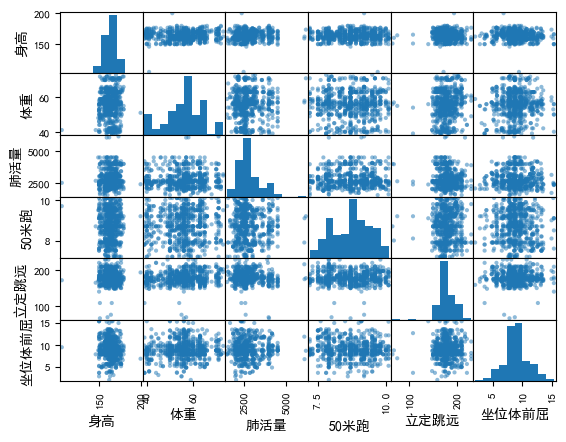

In [89]:
import matplotlib.pyplot as plt 
# 绘制散点图矩阵
pd.plotting.scatter_matrix(df)
plt.show()

In [90]:
corr = df.corr('pearson')
corr

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,1.000000,0.057989,0.099877,0.008939,-0.022818,-0.087274
体重,0.057989,1.000000,0.033474,0.015300,0.134597,0.083638
肺活量,0.099877,0.033474,1.000000,0.007832,-0.087716,-0.005454
50米跑,0.008939,0.015300,0.007832,1.000000,0.005558,-0.060121
立定跳远,-0.022818,0.134597,-0.087716,0.005558,1.000000,0.011953
坐位体前屈,-0.087274,0.083638,-0.005454,-0.060121,0.011953,1.000000


<AxesSubplot: >

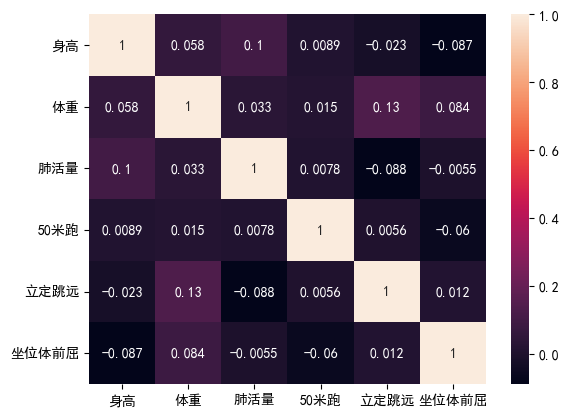

In [91]:
import seaborn as sns
sns.heatmap(corr, annot=True)

In [92]:
import scipy.stats as sta
# SPSS 皮尔逊检验
sta.pearsonr(df['坐位体前屈'], df['50米跑'])
# JB检验 n > 30
sta.jarque_bera(df, axis = 0).pvalue < 0.05
# 夏皮洛‐威尔克检验
for key in df.keys():
    print(key, sta.shapiro(df[key]))

身高 ShapiroResult(statistic=0.9546416997909546, pvalue=3.262963358709181e-14)
体重 ShapiroResult(statistic=0.9707038402557373, pvalue=6.436103733298282e-11)
肺活量 ShapiroResult(statistic=0.8979678153991699, pvalue=1.2901479064543103e-21)
50米跑 ShapiroResult(statistic=0.9741116762161255, pvalue=4.493796446070064e-10)
立定跳远 ShapiroResult(statistic=0.9288678765296936, pvalue=4.099373526143878e-18)
坐位体前屈 ShapiroResult(statistic=0.9813674688339233, pvalue=5.114353385238246e-08)


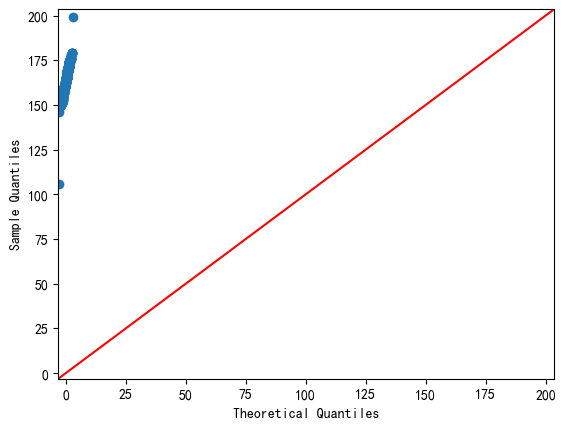

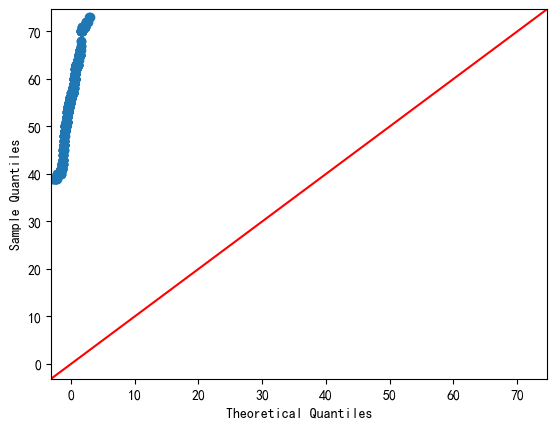

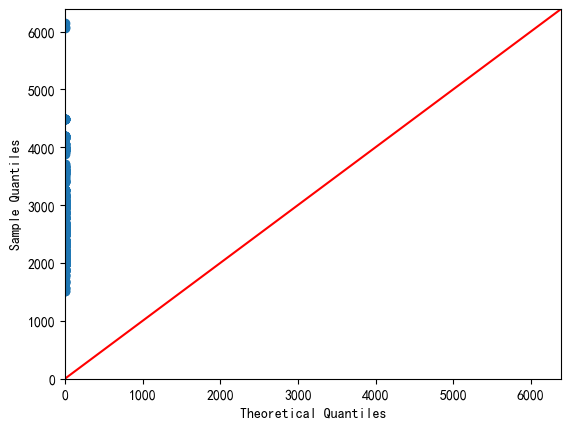

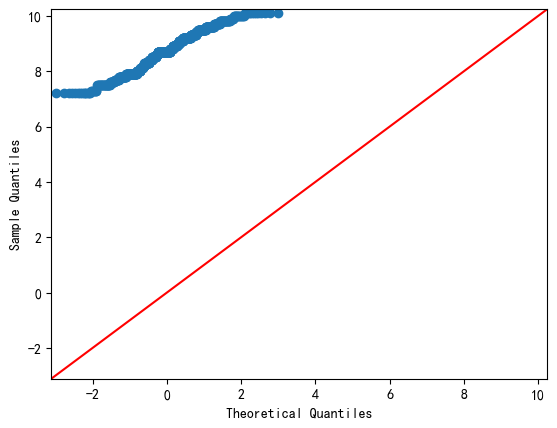

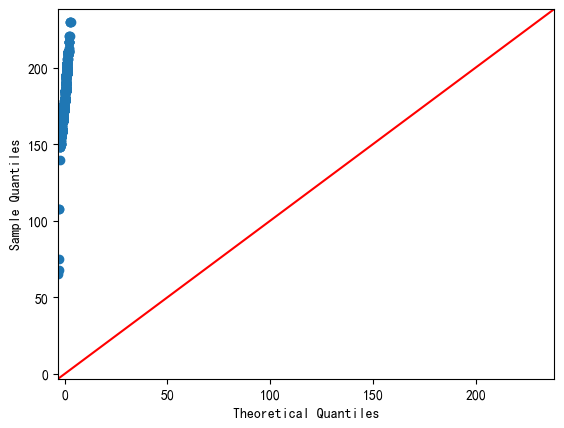

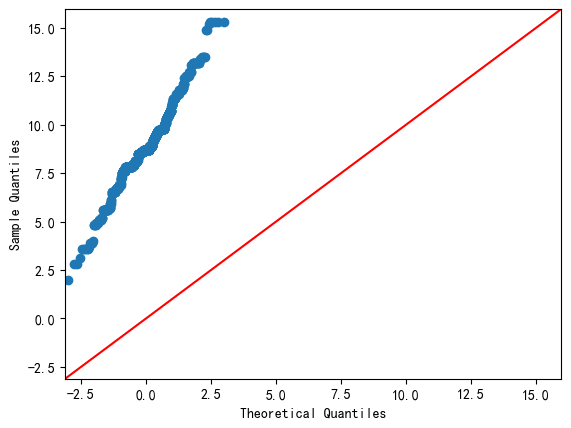

In [93]:
import statsmodels.api as sm
# QQ图
for key in df.keys():
    sm.qqplot(df[key], line='45')